In [1]:
import matplotlib
from tqdm import tqdm
import sys
sys.path.append('..')
from scipy import signal, stats, io
from neurolib.models.wc import WCModel
from neurolib.models import bold
from neurolib.utils import functions
from task_fc_simulation.onset_design_model import WCOnsetDesign
from task_fc_simulation.weight_matrix_utils import normalize, generate_modulars
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Avenir'
matplotlib.rcParams['font.size'] = 16
plt.rcParams['image.cmap'] = 'plasma'
np.set_printoptions(suppress=True)
%load_ext autoreload
%autoreload 2

In [22]:
np.__version__

'1.21.5'

In [19]:
mat_path = '../data/SOTs_new.mat'
#mat_path = '../data/SOTsBOLD.mat'
input_data = io.loadmat(mat_path)

In [3]:
input_data = io.loadmat(mat_path)
small_input_data = input_data.copy()
small_input_data['onsets'][0,0] = input_data['onsets'][0,0][:5]
small_input_data['onsets'][0,1] = input_data['onsets'][0,1][:5]
io.savemat("../data/test_input.mat", small_input_data)

## Симуляция
можно для начала проверить на совсем маленьком датасете
Проверяем на совсем маленьком сете
### Маленький датасет

In [8]:
%%time
num_regions = 30
mat_path = '../data/test_input.mat'
#оставила генерацию реста до нулевого тайминга
wc_block = WCOnsetDesign.from_matlab_structure(mat_path, num_regions=num_regions,
                                                rest_before=True, first_duration=6, last_duration=6,
                                                  append_outputs=False, bold=False)
#wc_block.generate_full_series()
#здесь говорим надо ли сразу выкинуть начало из болда, из нейрональной ничего не выкидывается
wc_block.generate_full_series(bold_chunkwise=True, TR=0.75)

CPU times: user 3.94 s, sys: 174 ms, total: 4.11 s
Wall time: 4.11 s


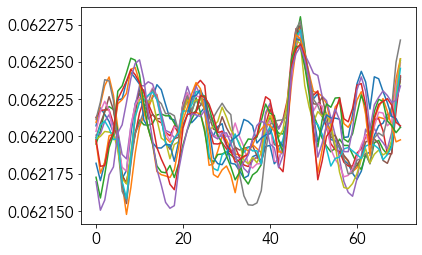

In [6]:
plt.plot(wc_block.BOLD[:15,15:].T);

## Полный датасет

In [9]:
%%time
num_regions = 30
mat_path = '../data/SOTs_new.mat'
#оставила генерацию реста до нулевого тайминга

wc_block =WCOnsetDesign.from_matlab_structure(mat_path, num_regions=num_regions,
                                                 rest_before=True, first_duration=6, last_duration=6)
wc_block.generate_full_series(bold_chunkwise=True, TR=0.72)
np.save(f"../results/Event30Bold_{0}TR072_RestBefore6s.npy", wc_block.BOLD)

CPU times: user 1min 29s, sys: 4.18 s, total: 1min 33s
Wall time: 1min 34s


In [16]:
%%time
num_regions = 30
mat_path = '../data/SOTs_new.mat'
#оставила генерацию реста до нулевого тайминга
for i in tqdm(range(1,15)):
    wc_block =WCOnsetDesign.from_matlab_structure(mat_path, num_regions=num_regions,
                                                 rest_before=True, first_duration=6, last_duration=6)
    wc_block.generate_full_series(bold_chunkwise=True, TR=0.72)
    np.save(f"../results/Event30Bold_{i}TR072_RestBefore6s.npy", wc_block.BOLD)

100%|███████████████████████████████████████████| 14/14 [21:11<00:00, 90.79s/it]

CPU times: user 20min 14s, sys: 54.4 s, total: 21min 8s
Wall time: 21min 11s


In [20]:
mat_path = '../data/SOTs_new.mat'
#mat_path = '../data/SOTsBOLD.mat'
input_data = io.loadmat(mat_path)
BOLD = np.load(f"../results/Event30Bold_{0}TR072_RestBefore6s.npy")
num_sub = 15
BOLD_subj = np.zeros((*BOLD.T.shape,num_sub))
for i in range(num_sub):
    BOLD_subj[:,:,i] = np.load(f"../results/Event30Bold_{i}TR072_RestBefore6s.npy").T
input_data['BOLD'] =  BOLD_subj
io.savemat("../data/SOTsBOLD_EventTR072_RestBefore6s.mat", input_data)    

In [18]:
%%time
num_regions = 30
mat_path = '../data/SOTs_4s_duration.mat'
#оставила генерацию реста до нулевого тайминга
for i in tqdm(range(0,15)):
    wc_block =WCOnsetDesign.from_matlab_structure(mat_path, num_regions=num_regions,
                                                 rest_before=True, first_duration=6, last_duration=6)
    wc_block.generate_full_series(bold_chunkwise=True, TR=2)
    np.save(f"../results/Event30Bold_{i}TR2_RestBefore6s.npy", wc_block.BOLD)

100%|██████████████████████████████████████████| 15/15 [37:55<00:00, 151.70s/it]

CPU times: user 36min 13s, sys: 1min 35s, total: 37min 49s
Wall time: 37min 55s


In [21]:
mat_path = '../data/SOTs_4s_duration.mat'
input_data = io.loadmat(mat_path)
BOLD = np.load(f"../results/Event30Bold_{0}TR2_RestBefore6s.npy")
num_sub = 15
BOLD_subj = np.zeros((*BOLD.T.shape,num_sub))
for i in range(num_sub):
    BOLD_subj[:,:,i] = np.load(f"../results/Event30Bold_{i}TR2_RestBefore6s.npy").T
input_data['BOLD'] =  BOLD_subj
io.savemat("../data/SOTsBOLD_EventTR2_RestBefore6s.mat", input_data)  

In [48]:
input_data['BOLD'] =  BOLD_subj
io.savemat("../data/SOTsBOLD.mat", input_data)

In [49]:
input_data = io.loadmat("../data/SOTsBOLD.mat")

In [50]:
input_data["BOLD"].shape

(700, 30, 6)

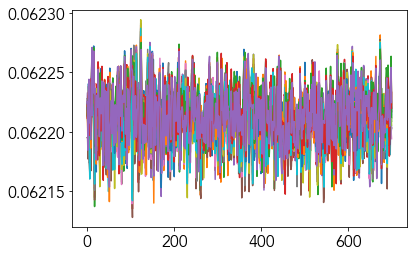

In [16]:
plt.plot(np.load(f"../results/Event30Bold_{1}.npy")[:15,:].T);

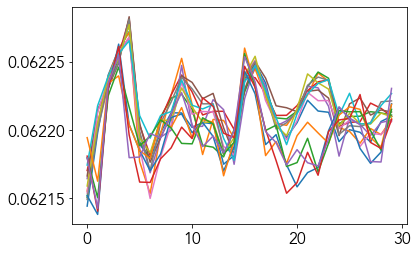

In [5]:
plt.plot(wc_block.BOLD[:15,:].T);

In [ ]:
#можно сохранить симуляцию вместе с номером (потом просто добавлять можно другие)
sim_num = 1
small_input_data["BOLD"] = {f"sim_{sim_num}": wc_block.BOLD}

In [ ]:
#если вдруг нужны тайминги
small_input_data["timings"] = wc_block.time_idxs_dict

In [ ]:
wc_block.time_idxs_dict

In [ ]:
# и вот тут живет нейрональная активность, ее тоже можно сохранить
wc_block.wc.exc.shape

## Полный файл

In [ ]:
%%time
num_regions = 30
mat_path = '../data/SOTs.mat'
#оставила генерацию реста до нулевого тайминга
wc_block = WCOnsetDesign.from_matlab_structure(mat_path, num_regions=num_regions,
                                                       rest_before=True, first_duration=12, last_duration=12)
wc_block.generate_full_series()
#здесь говорим надо ли сразу выкинуть начало из болда, из нейрональной ничего не выкидывается
wc_block.generate_bold(TR=2, drop_first=12, clear_exc=True)
plt.plot(wc_block.BOLD[:15,:].T);

In [ ]:
plt.plot(wc_block.BOLD[:15,:].T);

In [30]:
A = np.zeros((30,10))
np.hstack((np.empty(), A))

TypeError: empty() missing required argument 'shape' (pos 0)

In [60]:
31-31%15

30

In [58]:
A1 = A[:,9:10]

In [59]:
np.hstack((A1, A)).shape

(30, 11)